=== IRIS DATASET ANALYSIS ===

1. DATASET OVERVIEW
------------------------------
Dataset Shape: (150, 5)
Columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

First 5 rows:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   

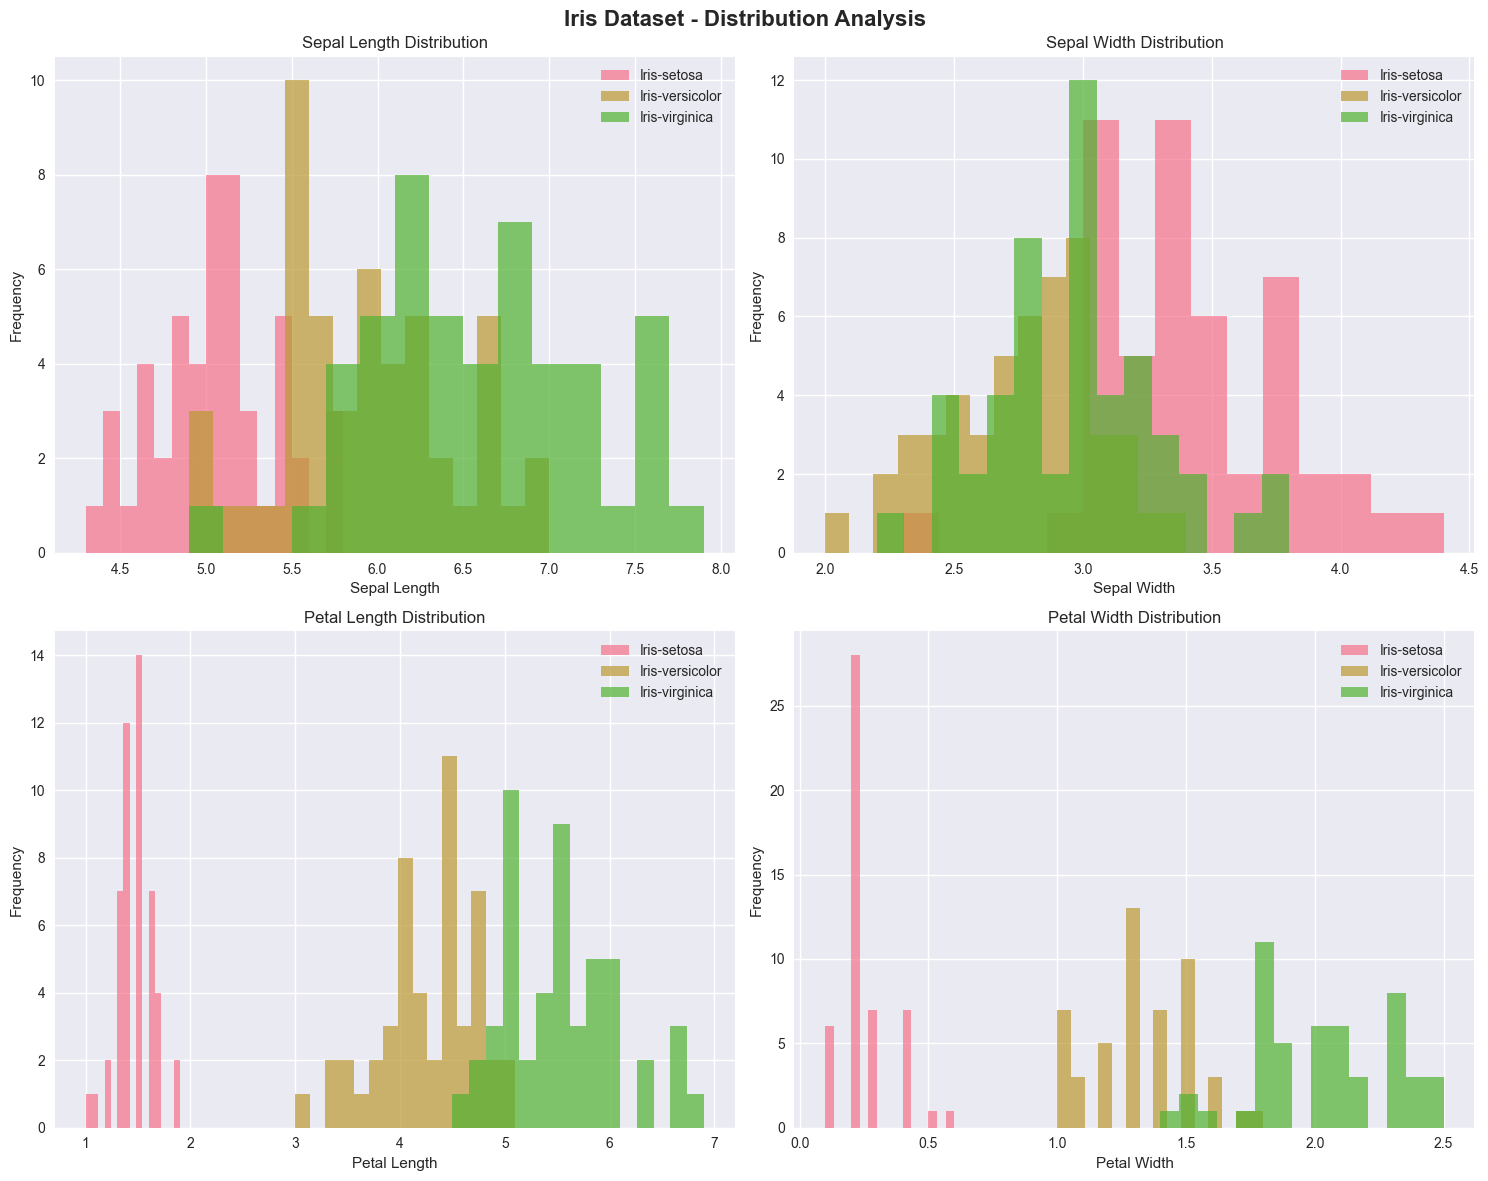

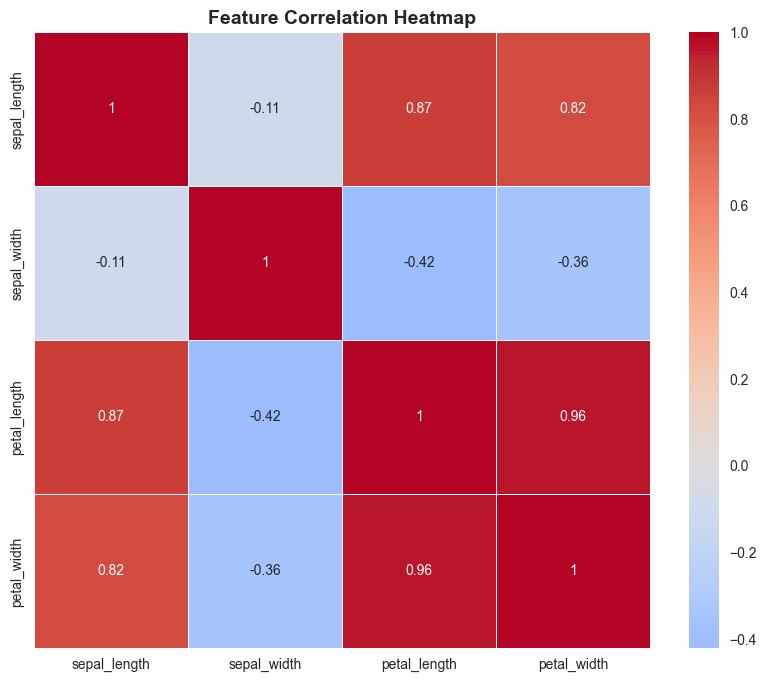

<Figure size 1200x1000 with 0 Axes>

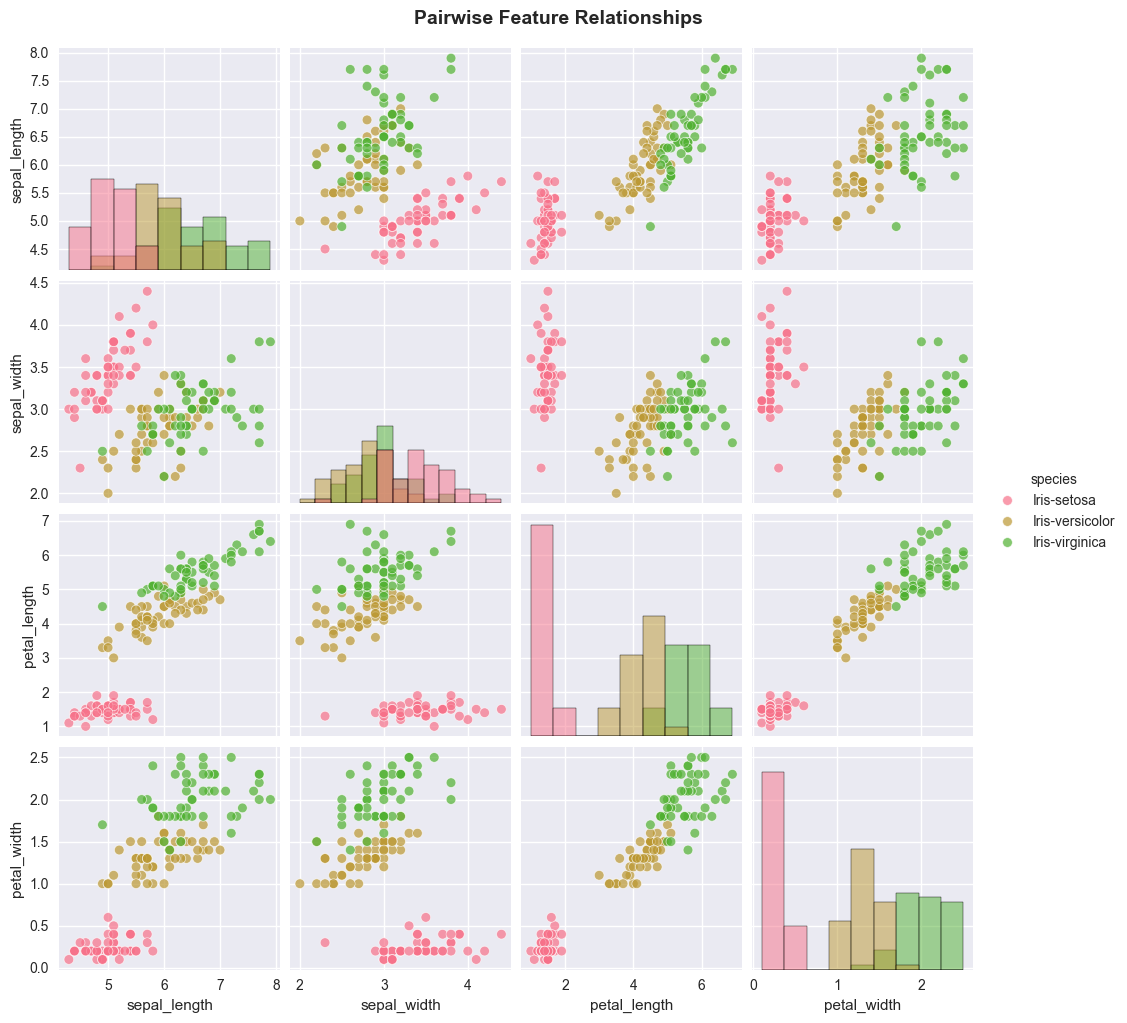

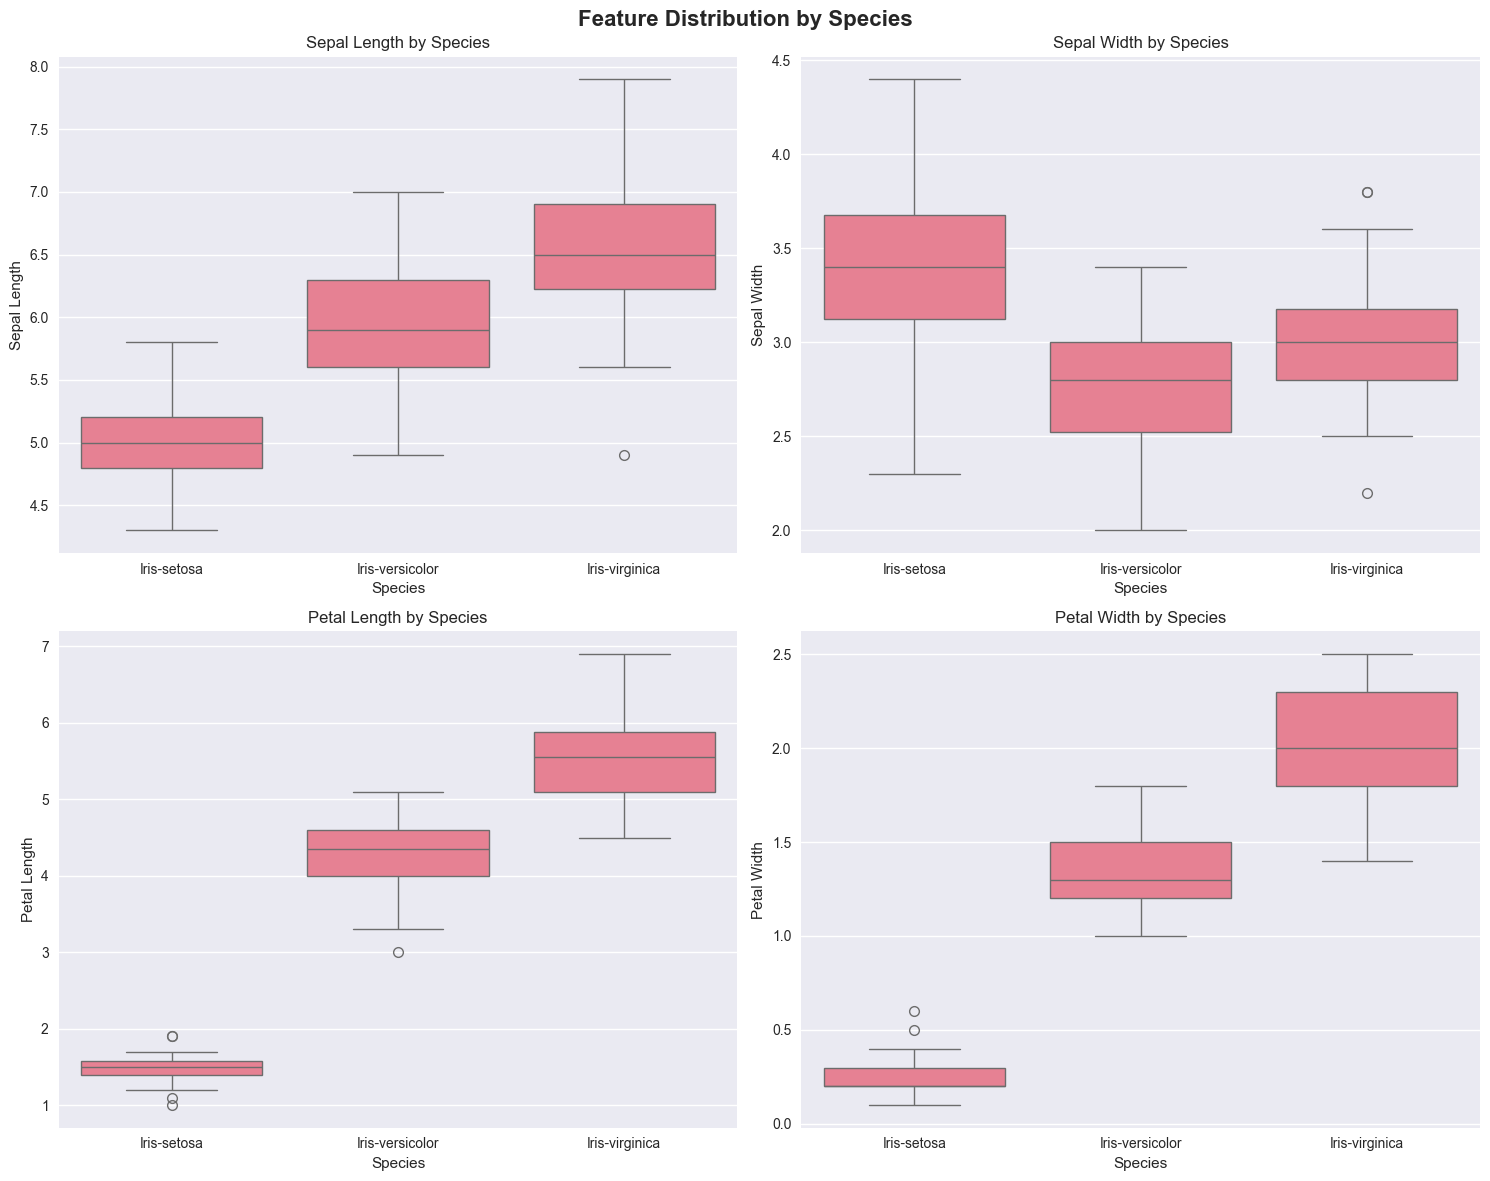


4. MACHINE LEARNING MODELS
------------------------------
Training set size: 120
Test set size: 30

Random Forest Results:
--------------------
Accuracy: 0.9000

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



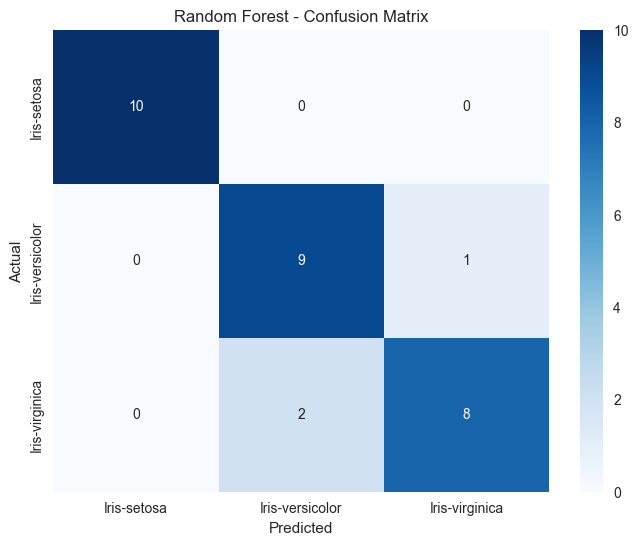


Logistic Regression Results:
--------------------
Accuracy: 0.9667

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



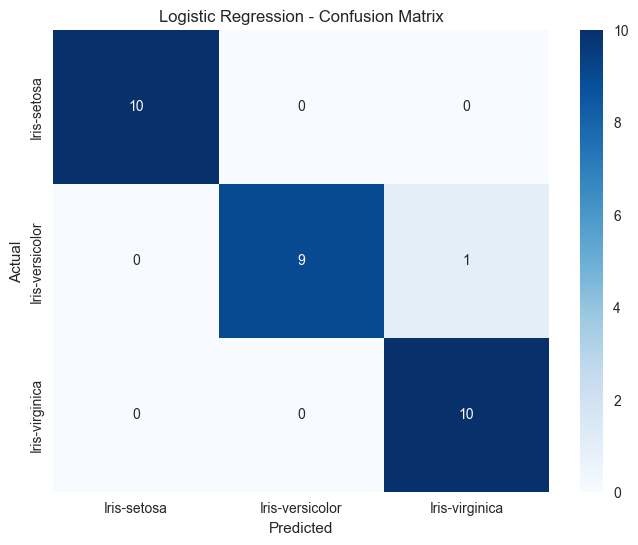


Support Vector Machine Results:
--------------------
Accuracy: 0.9667

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



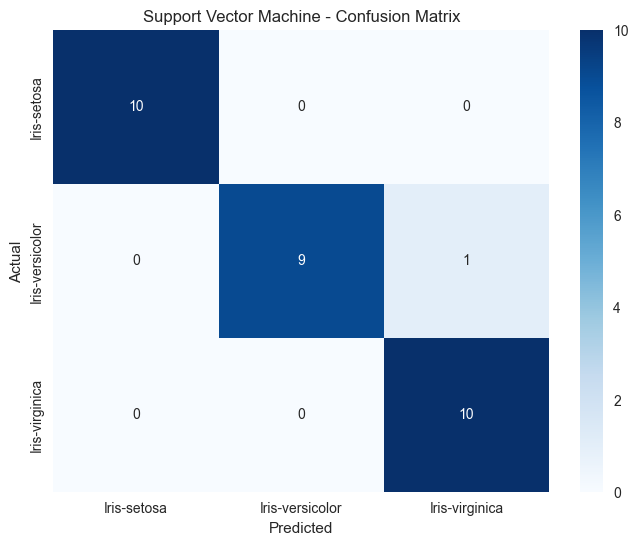


5. MODEL COMPARISON
------------------------------
Random Forest: 0.9000 (90.00%)
Logistic Regression: 0.9667 (96.67%)
Support Vector Machine: 0.9667 (96.67%)


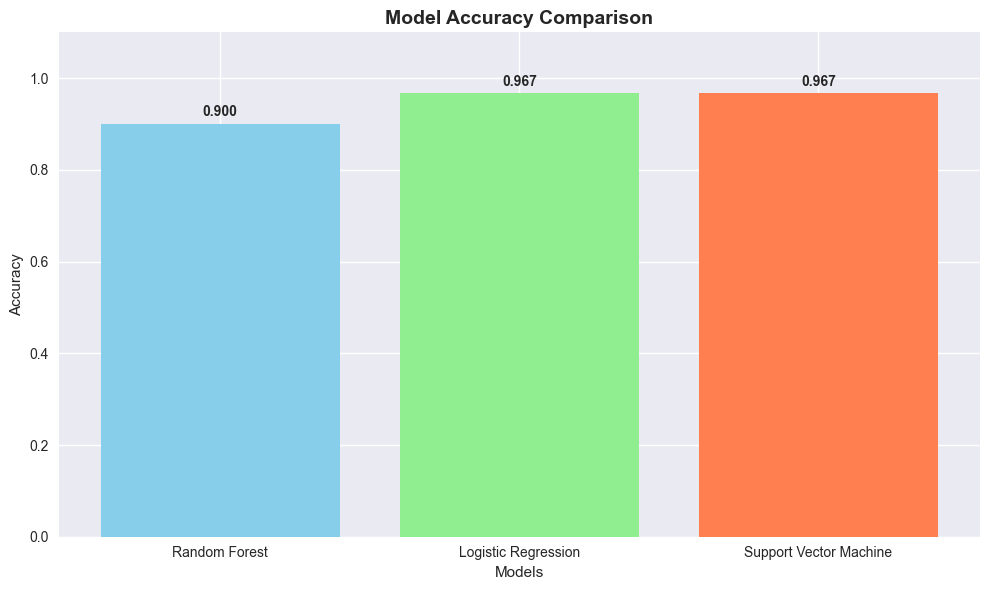


6. FEATURE IMPORTANCE
------------------------------
        feature  importance
3   petal_width    0.437185
2  petal_length    0.431466
0  sepal_length    0.116349
1   sepal_width    0.015000


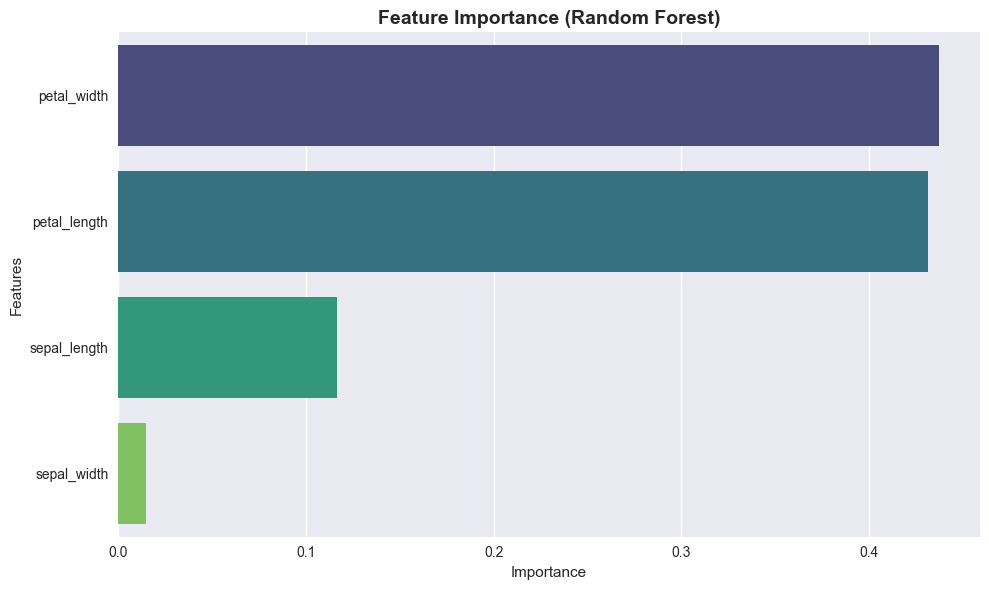


=== ANALYSIS COMPLETE ===
Key Findings:
1. The dataset is clean with no missing values
2. Petal length and width are most important features
3. All models achieve high accuracy (>90%)
4. Species can be clearly distinguished using these features


In [1]:
# Iris Flower Dataset Analysis
# Complete data science project with visualization and machine learning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
# Download from: https://www.kaggle.com/datasets/arshid/iris-flower-dataset
df = pd.read_csv('IRIS.csv')

print("=== IRIS DATASET ANALYSIS ===\n")

# 1. Basic Dataset Information
print("1. DATASET OVERVIEW")
print("-" * 30)
print(f"Dataset Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nFirst 5 rows:")
print(df.head())

print(f"\nDataset Info:")
print(df.info())

print(f"\nStatistical Summary:")
print(df.describe())

print(f"\nSpecies Distribution:")
print(df['species'].value_counts())

# 2. Data Cleaning and Preprocessing
print("\n2. DATA PREPROCESSING")
print("-" * 30)
print("Checking for missing values:")
print(df.isnull().sum())

print("Checking for duplicates:")
print(f"Duplicate rows: {df.duplicated().sum()}")

# 3. Exploratory Data Analysis (EDA)
print("\n3. EXPLORATORY DATA ANALYSIS")
print("-" * 30)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Iris Dataset - Distribution Analysis', fontsize=16, fontweight='bold')

# Histograms for each feature
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i, feature in enumerate(features):
    ax = axes[i//2, i%2]
    for species in df['species'].unique():
        data = df[df['species'] == species][feature]
        ax.hist(data, alpha=0.7, label=species, bins=15)
    ax.set_title(f'{feature.replace("_", " ").title()} Distribution')
    ax.set_xlabel(feature.replace("_", " ").title())
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.show()

# Pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='species', diag_kind='hist', plot_kws={'alpha': 0.7})
plt.suptitle('Pairwise Feature Relationships', y=1.02, fontsize=14, fontweight='bold')
plt.show()

# Box plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Feature Distribution by Species', fontsize=16, fontweight='bold')

for i, feature in enumerate(features):
    ax = axes[i//2, i%2]
    sns.boxplot(data=df, x='species', y=feature, ax=ax)
    ax.set_title(f'{feature.replace("_", " ").title()} by Species')
    ax.set_xlabel('Species')
    ax.set_ylabel(feature.replace("_", " ").title())

plt.tight_layout()
plt.show()

# 4. Machine Learning Models
print("\n4. MACHINE LEARNING MODELS")
print("-" * 30)

# Prepare data for modeling
X = df[features]
y = df['species']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Machine': SVC(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\n{name} Results:")
    print("-" * 20)
    
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 5. Model Comparison
print("\n5. MODEL COMPARISON")
print("-" * 30)
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Plot model comparison
plt.figure(figsize=(10, 6))
models_list = list(results.keys())
accuracies = list(results.values())
bars = plt.bar(models_list, accuracies, color=['skyblue', 'lightgreen', 'coral'])
plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)

# Add accuracy labels on bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{accuracy:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 6. Feature Importance (using Random Forest)
print("\n6. FEATURE IMPORTANCE")
print("-" * 30)
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("\n=== ANALYSIS COMPLETE ===")
print("Key Findings:")
print("1. The dataset is clean with no missing values")
print("2. Petal length and width are most important features")
print("3. All models achieve high accuracy (>90%)")
print("4. Species can be clearly distinguished using these features")